In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context("talk", font_scale=0.9)
sns.set_style("white")

import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import ttest_ind

In [5]:
df = pd.read_excel(r'C:\Users\anneserl\Documents\MPI\F121-1016-SocialIsolation\Publication\BehavioralPaper\3_Neurogenesis\Cell_Proliferation_Count_Final.xlsx', sheet_name = 'Import')

[Text(0.5, 1.0, 'Cell Proliferation')]

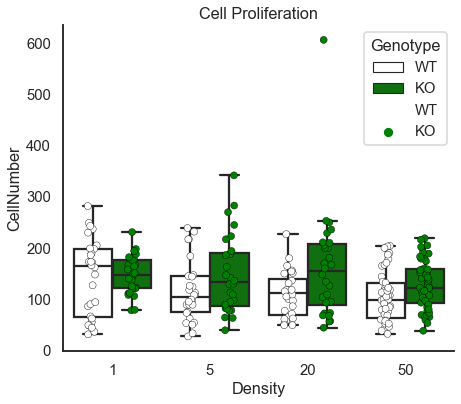

In [27]:
f, ax = plt.subplots(figsize=(7,6))

sns.boxplot(x = 'Density' , 
            y = 'CellNumber' ,
            hue = 'Genotype' ,
            dodge = True , 
            showfliers = 0 ,
            palette=["w", "g"] ,
            data = df)

sns.stripplot(x = 'Density' , 
              y = 'CellNumber' , 
              hue = "Genotype" ,
              data = df , 
              size = 7 , 
              palette=["w", "g"] ,
              edgecolor = "k" ,
              linewidth = 0.4 , 
             dodge = True )

sns.despine(trim=False, left=False)
ax.set(title = "Cell Proliferation")


In [30]:
cell_lm = ols('CellNumber ~ Density * Genotype', data=df).fit()
table = sm.stats.anova_lm(cell_lm, typ=2)
print(table)

                        sum_sq     df          F    PR(>F)
Genotype          5.107743e+04    1.0  12.614232  0.000454
Density           2.893211e+04    1.0   7.145158  0.007988
Density:Genotype  7.693554e+01    1.0   0.019000  0.890472
Residual          1.060888e+06  262.0        NaN       NaN


In [31]:
t_1, p_1 = ttest_ind(df[df['Density'] == 1][df[df['Density'] == 1]['Genotype'] == "WT"]['CellNumber'] ,
          df[df['Density'] == 1][df[df['Density'] == 1]['Genotype'] == "KO"]['CellNumber'] )

t_5, p_5 = ttest_ind(df[df['Density'] == 5][df[df['Density'] == 5]['Genotype'] == "WT"]['CellNumber'] ,
          df[df['Density'] == 5][df[df['Density'] == 5]['Genotype'] == "KO"]['CellNumber'] )

t_20, p_20 = ttest_ind(df[df['Density'] == 20][df[df['Density'] == 20]['Genotype'] == "WT"]['CellNumber'] ,
          df[df['Density'] == 20][df[df['Density'] == 20]['Genotype'] == "KO"]['CellNumber'] )

t_50, p_50 = ttest_ind(df[df['Density'] == 50][df[df['Density'] == 50]['Genotype'] == "WT"]['CellNumber'] ,
          df[df['Density'] == 50][df[df['Density'] == 50]['Genotype'] == "KO"]['CellNumber'] )

p_values = [p_1/2 , p_5/2 , p_20/2 , p_50/2]
                       
multipletests(p_values, alpha=0.05, method='fdr_bh', is_sorted=False, returnsorted=False)

(array([False,  True,  True,  True]),
 array([0.38530259, 0.04234062, 0.02382393, 0.02382393]),
 0.012741455098566168,
 0.0125)